In [1]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 65.3MB/s]


In [2]:
import pandas as pd
import numpy as np




> Add blockquote

**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**



In [3]:
df=pd.read_csv('/content/nba_logreg.csv')

Lets analyse the data a tiny bit!

What are the no. of rows and columns in the dataset?

In [4]:
df.shape

(1340, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [6]:
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [7]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Clean the dataset. Drop the NaN values!

In [8]:
df.dropna(inplace=True)

What is the shape of the dataframe now?

In [9]:
df.shape

(1329, 21)

For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.

In [10]:
x=df.drop(['Name','TARGET_5Yrs'],axis=1)

In [11]:
y=df['TARGET_5Yrs']

In [12]:
print("The shape of the features dataframe is:", x.shape)
print("The shape of the labels dataframe is:", y.shape)

The shape of the features dataframe is: (1329, 19)
The shape of the labels dataframe is: (1329,)


Import the sklearn module that allows us to split the dataset into train and test.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=42)

In [15]:
print("The shape of training features dataframe is:", x_train.shape)
print("The shape of testing features dataframe is:", x_test.shape)
print("The shape of training labels dataframe is:", y_train.shape)
print("The shape of testing labels dataframe is:", y_test.shape)

print("The train-to-test split ratio is:", len(x_train)/len(x_test))

The shape of training features dataframe is: (1302, 19)
The shape of testing features dataframe is: (27, 19)
The shape of training labels dataframe is: (1302,)
The shape of testing labels dataframe is: (27,)
The train-to-test split ratio is: 48.22222222222222


Now load the sklearn module that allows the creation of a logistic regression model.

In [16]:
from sklearn.linear_model import LogisticRegression

Onto training! Train the a logistic regression model using the training features and labels dataframes.

In [17]:
model=LogisticRegression()

In [23]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_pred=model.predict(x_train)

In [29]:
y_train.shape

(1302,)

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.
As an exercise, read about these and fill out the markdown below!

- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Calculate Accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate Precision
precision = precision_score(y_pred, y_train)

# Calculate Recall
recall = recall_score(y_pred, y_train)

# Calculate F1 Score
f1 = f1_score(y_pred, y_train)

print("Accuracy of the model is:",accuracy)
print("F1 score of the model is:",precision)
print("Precision of the model is:",recall)
print("Recall of the model is:",f1)


Accuracy of the model is: 0.7104454685099847
F1 score of the model is: 0.815136476426799
Precision of the model is: 0.7423728813559322
Recall of the model is: 0.7770549970431698


Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

Import the sklearn module that is used to implement a classification SVM

In [34]:
from sklearn.svm import SVC

Just as we had before, load and fit a model on our training dataset.

In [35]:
model=SVC()

In [36]:
y_pred=model.fit(x_train,y_train).predict(x_train)

In [37]:
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_pred, y_train)
precision = precision_score(y_pred, y_train)
recall = recall_score(y_pred, y_train)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.706605222734255
F1 Score: 0.7807118254879448
Precision: 0.8436724565756824
Recall: 0.7264957264957265


MULTICLASS CLASSIFICATION

In [38]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 45.4MB/s]


Import the csv social_well_being.csv as a pandas dataframe.

In [311]:
df=pd.read_csv('/content/social_well_being.csv')

Always analyse the data.

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB


In [244]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [245]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

Can you find out what these classes are?

In [246]:
classes = df['Dominant_Emotion'].unique()
print("The classes are:",classes)

The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [307]:
genders = df['Gender'].unique()
print("The genders are:",genders)
platforms=df['Platform'].unique()
print("The platforms used are:",platforms)

The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

In [ ]:
df=pd.get_dummies(df, columns=['Platform'])

In [ ]:
df=pd.get_dummies(df, columns=['Gender'])

In [ ]:
df.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Gender_Female,Gender_Male,Gender_Non-binary
0,1,25,120,3,45,10,12,Happiness,False,True,False,False,False,False,False,True,False,False
1,2,30,90,5,20,25,30,Anger,False,False,False,False,False,True,False,False,True,False
2,3,22,60,2,15,5,20,Neutral,True,False,False,False,False,False,False,False,False,True
3,4,28,200,8,100,30,50,Anxiety,False,True,False,False,False,False,False,True,False,False
4,5,33,45,1,5,2,10,Boredom,False,False,True,False,False,False,False,False,True,False


In [ ]:
for col in df.columns:
    if 'Gender_' in col:
        df[col] = df[col].astype(int)
    elif 'Platform_' in col:
        df[col] = df[col].astype(int)

In [ ]:
df.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Gender_Female,Gender_Male,Gender_Non-binary
0,1,25,120,3,45,10,12,Happiness,0,1,0,0,0,0,0,1,0,0
1,2,30,90,5,20,25,30,Anger,0,0,0,0,0,1,0,0,1,0
2,3,22,60,2,15,5,20,Neutral,1,0,0,0,0,0,0,0,0,1
3,4,28,200,8,100,30,50,Anxiety,0,1,0,0,0,0,0,1,0,0
4,5,33,45,1,5,2,10,Boredom,0,0,1,0,0,0,0,0,1,0


In [309]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Dominant_Emotion_Encoded'] =LabelEncoder().fit_transform(df['Dominant_Emotion'])

In [ ]:
df.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Platform_Facebook,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp,Gender_Female,Gender_Male,Gender_Non-binary,Dominant_Emotion_Encoded
0,1,25,120,3,45,10,12,Happiness,0,1,0,0,0,0,0,1,0,0,3
1,2,30,90,5,20,25,30,Anger,0,0,0,0,0,1,0,0,1,0,0
2,3,22,60,2,15,5,20,Neutral,1,0,0,0,0,0,0,0,0,1,4
3,4,28,200,8,100,30,50,Anxiety,0,1,0,0,0,0,0,1,0,0,1
4,5,33,45,1,5,2,10,Boredom,0,0,1,0,0,0,0,0,1,0,2


Import the module used for label encoding.

In [ ]:
X = df.drop(['User_ID', 'Dominant_Emotion','Dominant_Emotion_Encoded'],axis=1)
y = df['Dominant_Emotion_Encoded']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"The shape of training features dataframe is: {X_train.shape}")
print(f"The shape of testing features dataframe is: {X_test.shape}")
print(f"The shape of training labels dataframe is: {y_train.shape}")
print(f"The shape of test labels dataframe is: {y_test.shape}")
ratio = len(X_train) / len(X_test)
print(f"The train-to-test split ratio is: {ratio}")

The shape of training features dataframe is: (739, 16)
The shape of testing features dataframe is: (185, 16)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


Import the module used for training a KNN model.

Train your model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model is: {accuracy}")


Accuracy of the model is: 0.9891891891891892


In [ ]:
y_pred

array([0, 0, 2, 3, 4, 1, 4, 1, 4, 2, 4, 4, 2, 3, 1, 1, 1, 1, 3, 3, 0, 2,
       4, 3, 2, 4, 0, 1, 0, 4, 1, 5, 1, 3, 0, 1, 0, 3, 5, 1, 0, 0, 5, 4,
       3, 4, 4, 0, 3, 2, 5, 1, 1, 5, 3, 0, 1, 4, 1, 3, 1, 3, 0, 1, 3, 3,
       3, 1, 4, 3, 4, 2, 2, 1, 4, 3, 4, 3, 0, 5, 5, 4, 5, 0, 3, 3, 0, 0,
       5, 3, 1, 4, 0, 5, 4, 3, 3, 5, 3, 5, 5, 1, 2, 3, 4, 3, 5, 4, 2, 4,
       2, 3, 3, 3, 0, 4, 4, 1, 4, 5, 0, 0, 1, 0, 5, 4, 3, 1, 2, 0, 3, 1,
       5, 2, 1, 3, 4, 3, 5, 3, 1, 2, 2, 3, 4, 4, 0, 5, 4, 3, 4, 1, 2, 4,
       0, 0, 1, 4, 1, 3, 2, 5, 1, 4, 1, 3, 4, 3, 5, 1, 0, 0, 3, 2, 5, 1,
       5, 5, 0, 3, 2, 1, 0, 5, 3])

In [ ]:
LabelEncoder().fit(df['Dominant_Emotion'])
y_train_encoded = LabelEncoder().transform(y_train)
y_test_encoded = LabelEncoder().transform(y_test)

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [255]:
! gdown 1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX

Downloading...
From: https://drive.google.com/uc?id=1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX
To: /content/IPL 2022 Batters.csv
100% 7.91k/7.91k [00:00<00:00, 10.6MB/s]


In [291]:
dl=pd.read_csv('IPL 2022 Batters.csv')

In [292]:
dl.shape

(162, 12)

In [293]:
dl=dl.dropna()

In [294]:
dl.shape

(162, 12)

In [295]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB


In [296]:
values = []
for i,val in enumerate(dl['Avg'].values) :
  if val == '-' :
    values.append(0)
  else :
    values.append(float(val))

df['Avg'] = values

In [297]:
dl = dl.drop(["Player"], axis = 1)

In [298]:
dl.head()

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,17,17,2,863,116,57.53,579,149.05,4,4,83
1,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,16,16,2,483,96,34.5,365,132.32,0,4,51


In [299]:
dl.isnull().sum()

Mat     0
Inns    0
NO      0
Runs    0
HS      0
Avg     0
BF      0
SR      0
100     0
50      0
4s      0
dtype: int64

In [300]:
dl=dl.dropna()

In [301]:
dl['HS'] = dl['HS'].str.rstrip('*')

In [302]:
X = dl.drop(['4s'],axis=1)
y=dl['4s']

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [ ]:
y_pred

array([ 1.05387986,  0.85135457,  0.9910092 , 12.99349914,  3.48611309,
       29.50657853,  3.47331241, 15.33855043,  3.41591535, -0.26441354,
       36.93624221,  4.38036815, 38.92041012,  9.54401354, 28.59449421,
       24.96473174,  2.04562168,  2.07735459,  5.01598211, 36.25978411,
        8.25986538, 35.83072782, 40.67190397, 46.4206017 , 25.77293802,
       -0.05570364,  1.69027357, 14.41618655,  1.07305857,  1.48857523,
        1.6278393 ,  5.04182482, 14.46614437])

In [ ]:
df=pd.read_csv('iris (1).csv')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 15.618984575256057
Mean Absolute Error (MAE): 2.986210685097894
Root Mean Squared Error (RMSE): 3.952086104231037


In [304]:
! gdown 1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw

Downloading...
From: https://drive.google.com/uc?id=1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw
To: /content/iris.csv
100% 2.47k/2.47k [00:00<00:00, 7.21MB/s]


In [306]:
df=pd.read_csv('iris.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.shape

(150, 4)

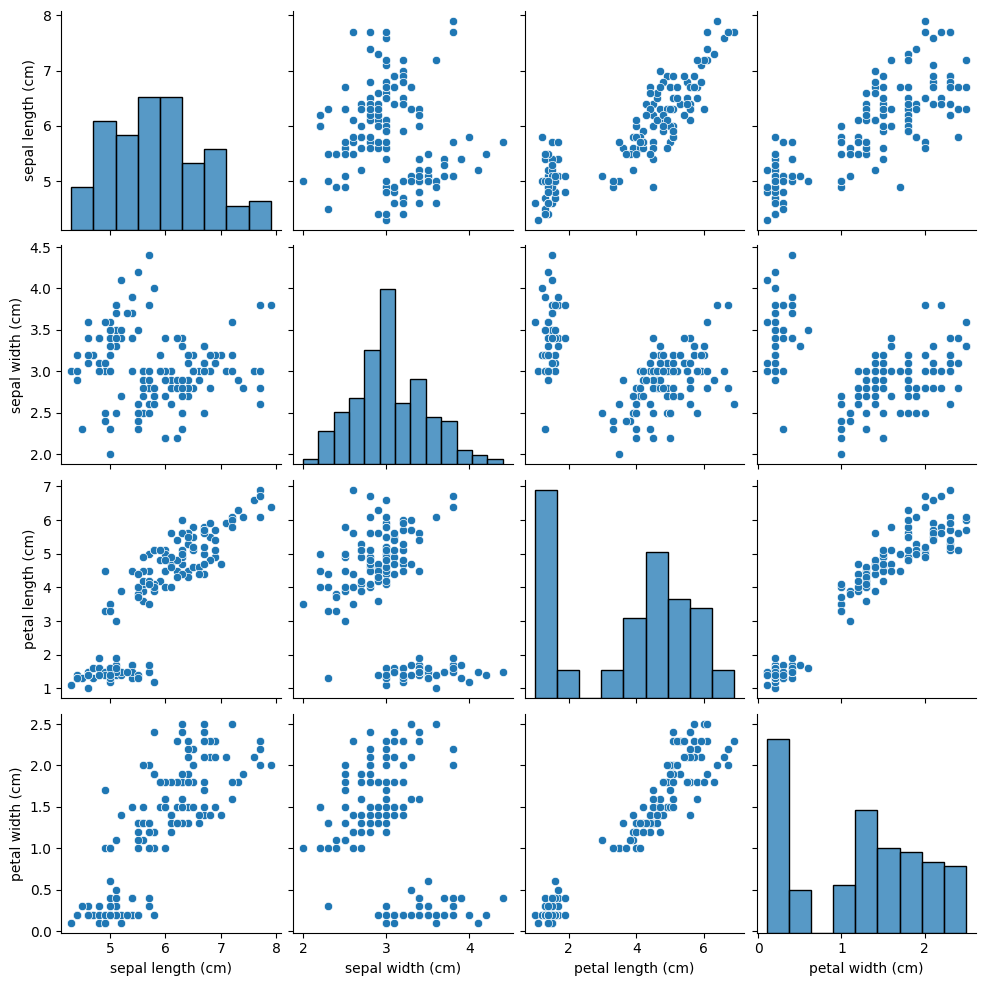

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Assuming X is your feature matrix
# Instantiate the KMeans model
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(df)

# Predict the clusters for the data points
labels = kmeans.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['Cluster'] = kmeans.labels_

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_counts = df['Cluster'].value_counts()
print("Cluster Centers:")
print(cluster_centers)
print("\nNumber of Observations in Each Cluster:")
print(cluster_counts)

Cluster Centers:
[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.428      1.462      0.246     ]
 [7.475      3.125      6.3        2.05      ]
 [6.24722222 2.84722222 4.775      1.575     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]

Number of Observations in Each Cluster:
Cluster
1    50
3    36
0    28
4    24
2    12
Name: count, dtype: int64


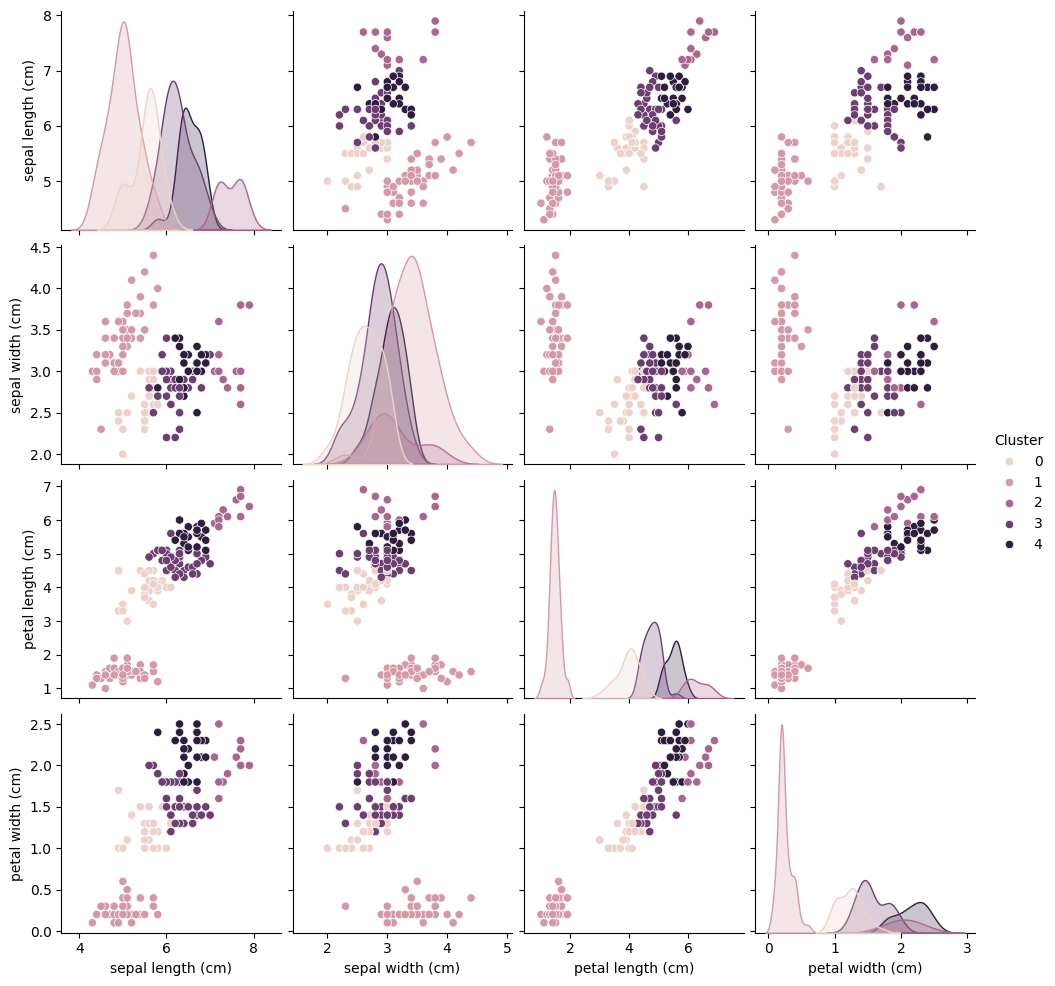

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Cluster')